<a href="https://colab.research.google.com/github/Soumiksb06/Data-Science-Hub/blob/main/Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# metadata
print(credit_approval.metadata)

# variable information
print(credit_approval.variables)

{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [ ]:
X.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.0+ KB


In [ ]:
y.value_counts()

A16
-      383
+      307
Name: count, dtype: int64

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Identify categorical and continuous columns
categorical_columns = X.select_dtypes(include=['object']).columns
continuous_columns = X.select_dtypes(include=['number']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, continuous_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataframe conversion

In [ ]:
import pandas as pd

# Assuming X_preprocessed is the processed dataset and continuous_columns is a list of continuous feature names

# Convert preprocessed data back to a DataFrame for EDA
X_preprocessed_df = pd.DataFrame(X_preprocessed)

# Get the feature names for the preprocessed DataFrame
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)
all_feature_names = list(continuous_columns) + list(cat_feature_names)

# Assign feature names to the DataFrame
X_preprocessed_df.columns = all_feature_names

# Display the first few rows to verify
print(X_preprocessed_df.head())

     A15    A14  A11    A8     A3     A2  A13_g  A13_p  A13_s  A12_f  ...  \
0    0.0  202.0  1.0  1.25  0.000  30.83    1.0    0.0    0.0    1.0  ...   
1  560.0   43.0  6.0  3.04  4.460  58.67    1.0    0.0    0.0    1.0  ...   
2  824.0  280.0  0.0  1.50  0.500  24.50    1.0    0.0    0.0    1.0  ...   
3    3.0  100.0  5.0  3.75  1.540  27.83    1.0    0.0    0.0    0.0  ...   
4    0.0  120.0  0.0  1.71  5.625  20.17    0.0    0.0    1.0    1.0  ...   

   A6_w  A6_x  A5_g  A5_gg  A5_p  A4_l  A4_u  A4_y  A1_a  A1_b  
0   1.0   0.0   1.0    0.0   0.0   0.0   1.0   0.0   0.0   1.0  
1   0.0   0.0   1.0    0.0   0.0   0.0   1.0   0.0   1.0   0.0  
2   0.0   0.0   1.0    0.0   0.0   0.0   1.0   0.0   1.0   0.0  
3   1.0   0.0   1.0    0.0   0.0   0.0   1.0   0.0   0.0   1.0  
4   1.0   0.0   1.0    0.0   0.0   0.0   1.0   0.0   0.0   1.0  

[5 rows x 46 columns]


## EDA

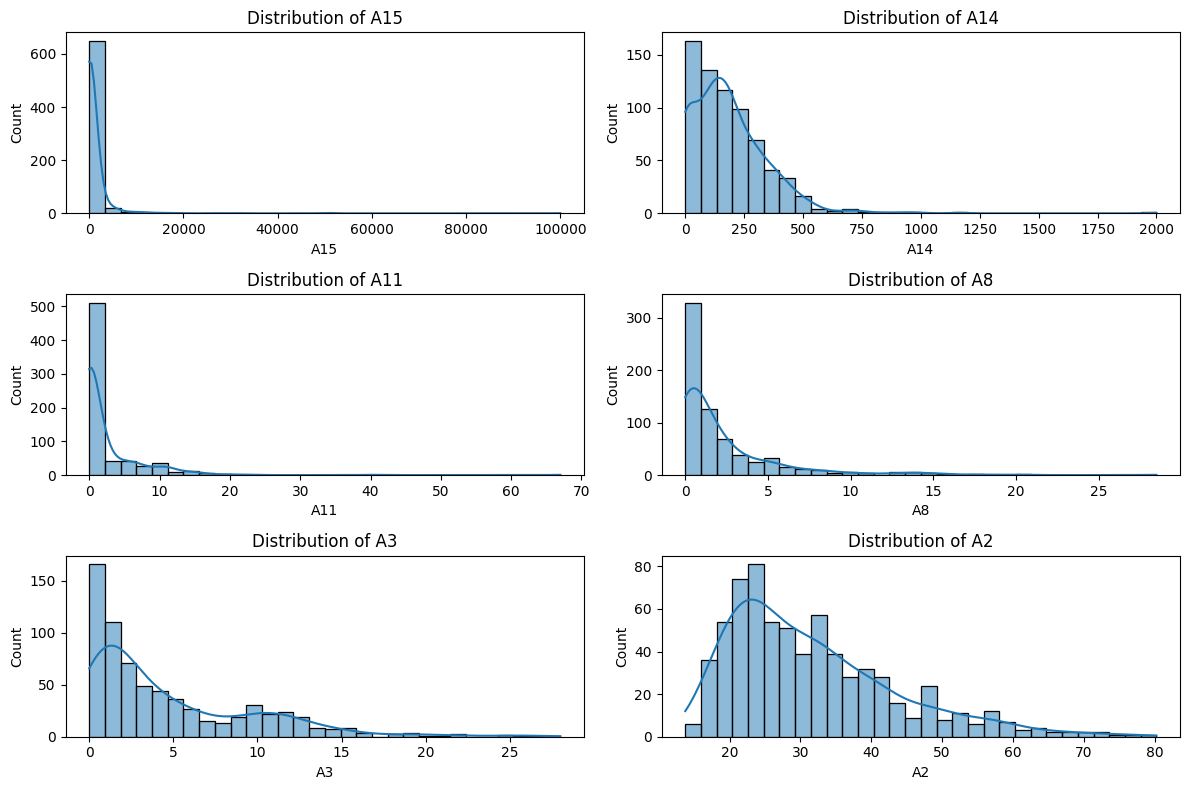

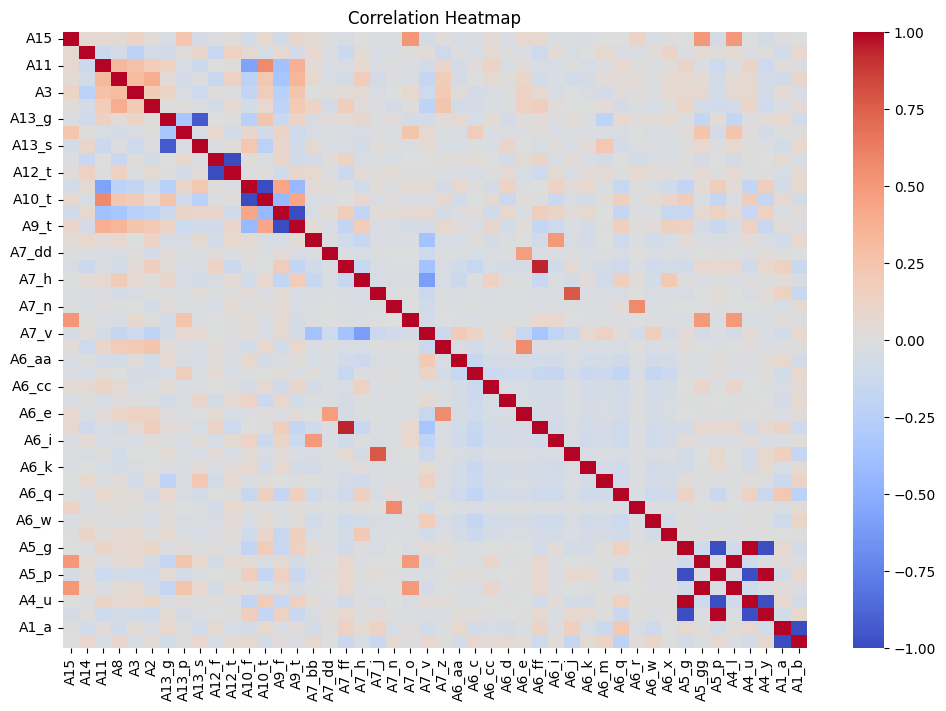

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_preprocessed_df is the processed dataset
# X_preprocessed_df is already defined with the correct columns

# Plot the distribution of continuous features
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(X_preprocessed_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_preprocessed_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Forecasting model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y_encoded, test_size=0.2, random_state=42)

# Build and train the ensemble model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluate the models
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_predictions))

print('Gradient Boosting Classification Report:')
print(classification_report(y_test, gb_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        70
           1       0.84      0.87      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        70
           1       0.76      0.85      0.81        68

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



## Set up alert mechanism

In [ ]:
# Assuming a binary classification (1: Positive, 0: Negative)
target_proba = rf_model.predict_proba(X_test)[:, 1]  # Use probabilities from Random Forest

# Set a threshold (e.g., 0.65) to determine alerts
threshold = 0.5
alerts = target_proba >= threshold

# Print alerts
for i, alert in enumerate(alerts):
    if not alert:
        print(f"Alert: Potential issue with prediction {i + 1}")


Alert: Potential issue with prediction 2
Alert: Potential issue with prediction 8
Alert: Potential issue with prediction 12
Alert: Potential issue with prediction 14
Alert: Potential issue with prediction 16
Alert: Potential issue with prediction 24
Alert: Potential issue with prediction 27
Alert: Potential issue with prediction 28
Alert: Potential issue with prediction 31
Alert: Potential issue with prediction 32
Alert: Potential issue with prediction 33
Alert: Potential issue with prediction 34
Alert: Potential issue with prediction 35
Alert: Potential issue with prediction 36
Alert: Potential issue with prediction 37
Alert: Potential issue with prediction 38
Alert: Potential issue with prediction 39
Alert: Potential issue with prediction 40
Alert: Potential issue with prediction 41
Alert: Potential issue with prediction 42
Alert: Potential issue with prediction 44
Alert: Potential issue with prediction 46
Alert: Potential issue with prediction 52
Alert: Potential issue with predicti

## KPIs

Feature ranking:
1. Feature A9_f (0.18472264241497513)
2. Feature A9_t (0.14203475088897688)
3. Feature A11 (0.07816030269945451)
4. Feature A8 (0.07394422520586003)
5. Feature A3 (0.06901298273621147)
6. Feature A15 (0.06845007593644342)
7. Feature A14 (0.05815721066743934)
8. Feature A2 (0.05650060142870807)
9. Feature A10_t (0.03853164071998946)
10. Feature A10_f (0.035709700722655266)
11. Feature A7_h (0.014428701200875494)
12. Feature A6_q (0.010167566499085514)
13. Feature A12_t (0.009575983791952304)
14. Feature A12_f (0.009411532352816047)
15. Feature A1_b (0.008760799396816073)
16. Feature A1_a (0.00818562365908951)
17. Feature A6_k (0.007982675344059912)
18. Feature A5_p (0.007936682678166572)
19. Feature A6_c (0.007808936409712622)
20. Feature A7_v (0.007613003516257461)
21. Feature A4_y (0.007273818182084057)
22. Feature A13_g (0.007203852474391008)
23. Feature A4_u (0.0069598742819977875)
24. Feature A6_x (0.006626459336680351)
25. Feature A6_cc (0.006438841610765546)
26. 

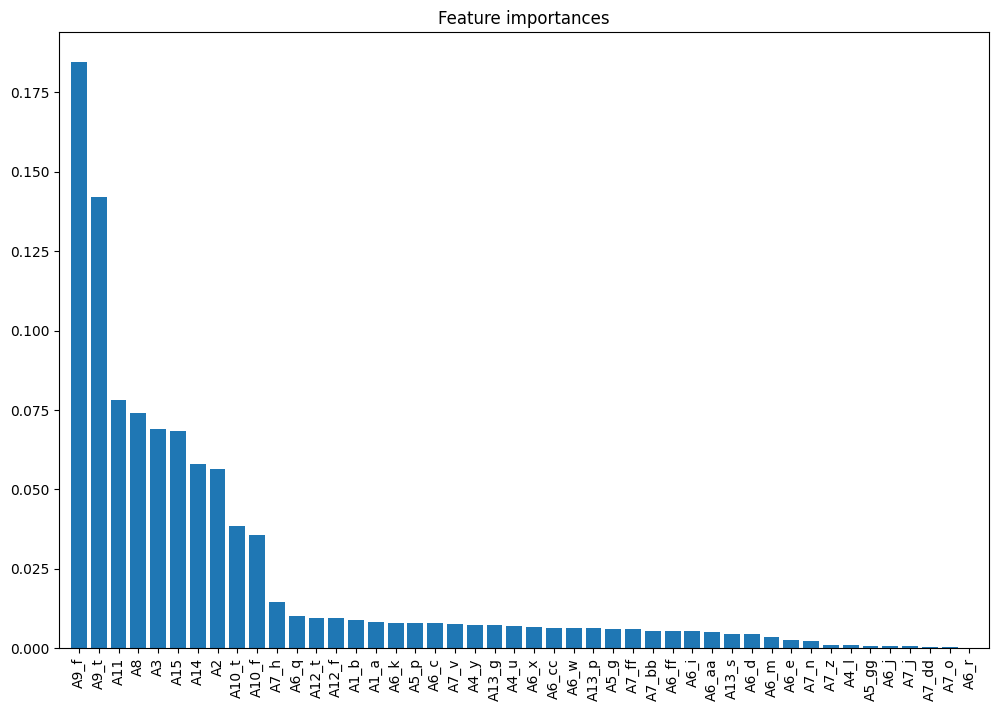

In [ ]:
import numpy as np

# Feature importances from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_preprocessed_df.shape[1]):
    print(f"{f + 1}. Feature {X_preprocessed_df.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_preprocessed_df.shape[1]), importances[indices], align="center")
plt.xticks(range(X_preprocessed_df.shape[1]), [X_preprocessed_df.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_preprocessed_df.shape[1]])
plt.show()


# Other data

In [48]:
import pandas as pd
import numpy as np
from dateutil import parser
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Loan payments data.csv')

# Display the first few rows of the dataset
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [49]:
# Handle missing values (if any)
data['past_due_days'].fillna(0, inplace=True)

# Convert dates to datetime format using parser
data['effective_date'] = data['effective_date'].apply(parser.parse)
data['due_date'] = data['due_date'].apply(parser.parse)

# Handle inconsistent date formats and invalid entries for paid_off_time
def parse_dates(date):
    try:
        return parser.parse(date)
    except (ValueError, TypeError):
        return pd.NaT

data['paid_off_time'] = data['paid_off_time'].apply(parse_dates)

# Extract new features from dates
data['loan_duration'] = (data['due_date'] - data['effective_date']).dt.days
data['days_to_payoff'] = (data['paid_off_time'] - data['effective_date']).dt.days

# Encode categorical variables
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['education'] = le.fit_transform(data['education'])
data['Gender'] = le.fit_transform(data['Gender'])

# Split data into features and target
X = data.drop(columns=['Loan_ID', 'paid_off_time', 'effective_date', 'due_date', 'loan_status'])
y = data['loan_status']

# Handle missing values in the dataset
imputer_continuous = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Separate continuous and categorical columns
continuous_cols = ['Principal', 'terms', 'past_due_days', 'age', 'loan_duration', 'days_to_payoff']
categorical_cols = ['education', 'Gender']

X[continuous_cols] = imputer_continuous.fit_transform(X[continuous_cols])
X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

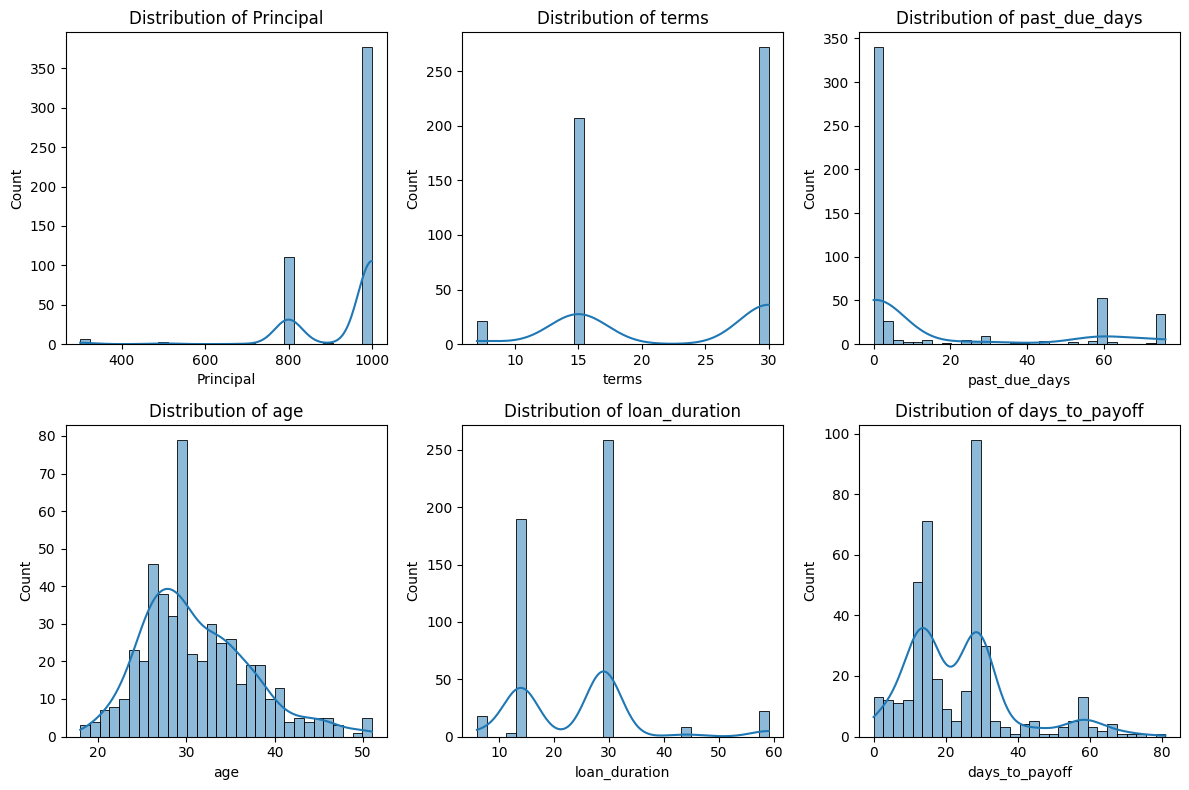

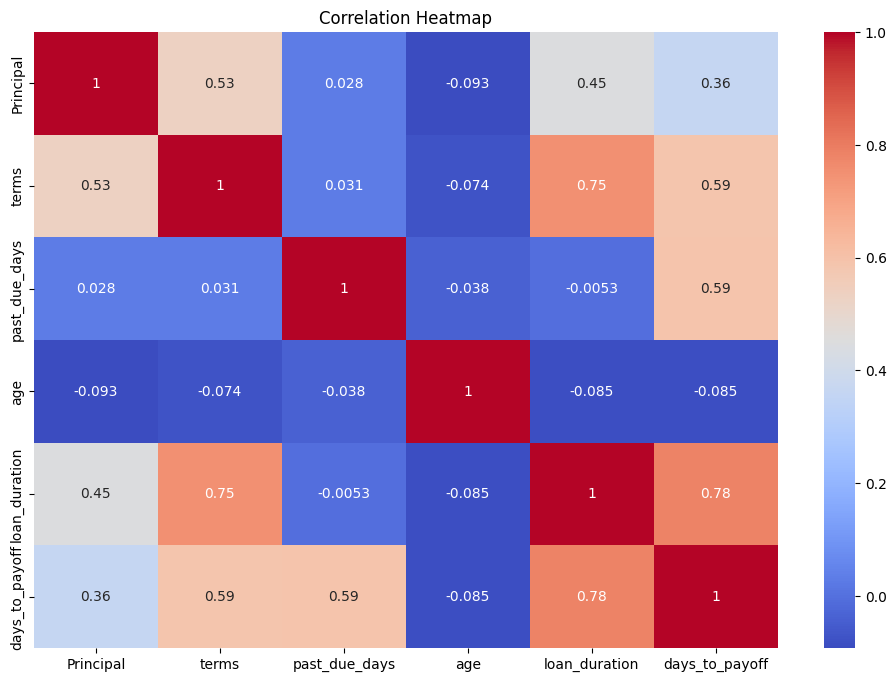

In [50]:
# Plot distributions of continuous features
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[continuous_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train the Random Forest model with regularization
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
y_val_pred = rf_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Evaluate on the test set
y_test_pred = rf_model.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        45

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Cross-validation scores: [1.   0.99 1.   1.   1.  ]
Mean cross-validation score: 0.998
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        43

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [52]:
# Implementing Alert System

# Get predicted probabilities from the model
target_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Set a threshold (e.g., 0.5) to determine alerts
threshold = 0.5
alerts = target_proba < threshold

# Print alerts for predictions below the threshold
for i, alert in enumerate(alerts):
    if alert:
        print(f"Alert: Potential issue with loan application {i + 1} (Predicted probability: {target_proba[i]})")

Alert: Potential issue with loan application 1 (Predicted probability: 0.0)
Alert: Potential issue with loan application 2 (Predicted probability: 0.0)
Alert: Potential issue with loan application 3 (Predicted probability: 0.002)
Alert: Potential issue with loan application 5 (Predicted probability: 0.0)
Alert: Potential issue with loan application 6 (Predicted probability: 0.0)
Alert: Potential issue with loan application 7 (Predicted probability: 0.0)
Alert: Potential issue with loan application 8 (Predicted probability: 0.005)
Alert: Potential issue with loan application 9 (Predicted probability: 0.04875)
Alert: Potential issue with loan application 11 (Predicted probability: 0.09308333333333332)
Alert: Potential issue with loan application 16 (Predicted probability: 0.0)
Alert: Potential issue with loan application 17 (Predicted probability: 0.023333333333333334)
Alert: Potential issue with loan application 18 (Predicted probability: 0.011785714285714287)
Alert: Potential issue wit

Feature ranking:
1. Feature past_due_days (0.6604628530425556)
2. Feature days_to_payoff (0.2549507493068259)
3. Feature age (0.02679461305504071)
4. Feature loan_duration (0.02411781865455034)
5. Feature terms (0.01570114838260016)
6. Feature education (0.007883458427254027)
7. Feature Principal (0.005891153515982383)
8. Feature Gender (0.004198205615191029)


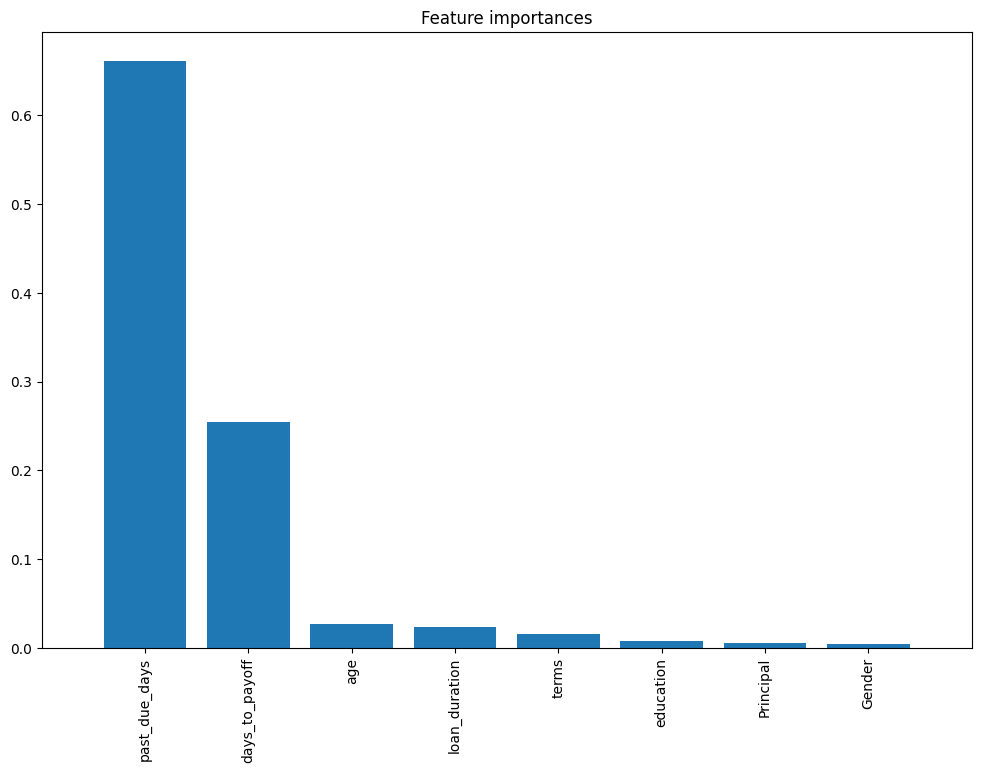

In [53]:
# Monitoring Key Performance Indicators (KPIs)

# Feature importances from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()